<a href="https://colab.research.google.com/github/MelihTalha1/ControlSystem_with_HandGestures/blob/master/microscope_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🔬  Microscopic Image Analysis: Segmentation of Cellular Structures**
---
🎯 Objective
---
In this study, various image processing techniques are applied to microscopic cellular images to clearly separate the cells and make them more suitable for analysis.

🧪 Applied Processing Steps
---
1. Preprocessing
---
Grayscale Conversion: Converting colored images to grayscale to simplify further processing.

Gaussian Blur: Reducing noise in the image to enable more accurate segmentation.

2. Segmentation
---
Otsu Thresholding: Automatically separating the background and foreground based on pixel intensity distribution.

3. Morphological Operations
---
Opening: Removing small noise from the image.

Dilation: Expanding the size of objects to obtain more robust segments.

4. Object Separation
---
Distance Transform: Identifying the centers of the cells.

Watershed Algorithm: Precisely determining the boundaries of the cells.



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Grayscale Conversion**
---
📌 Purpose:
---
To convert colored microscope images into a simpler format, making them suitable for subsequent image processing steps.

🔍 Implementation:
---
Grayscale conversion was applied to two different microscope images.

Color information was removed, retaining only the luminance (intensity) data.

This provided a simplified and processable image for operations such as segmentation and thresholding.

🖼️ Result:
---
Cellular structures in the images became more prominent,

Errors caused by noise and color variations were minimized.


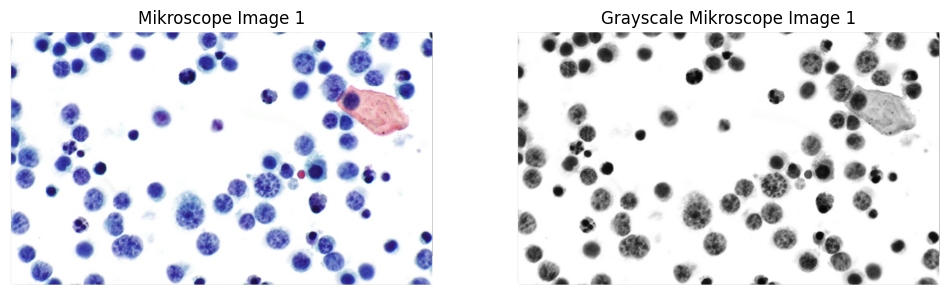

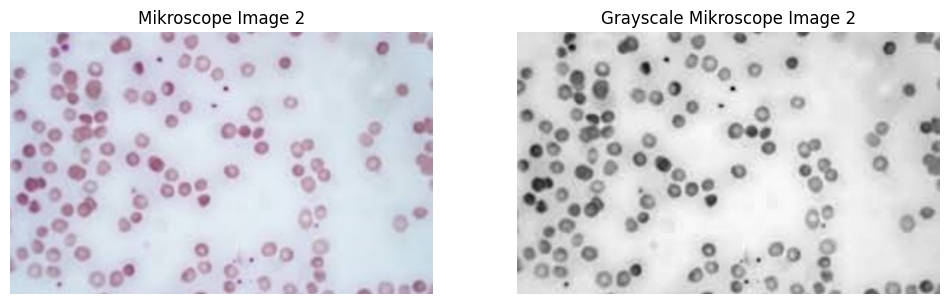

In [ ]:
# 1.Mikroscope Image
microscopy_image = cv2.imread("lymphoma_pleural.jpeg")
microscopy_gray = cv2.cvtColor(microscopy_image, cv2.COLOR_BGR2GRAY)
microscopy_image_rgb = cv2.cvtColor(microscopy_image, cv2.COLOR_BGR2RGB)


'''
print("Mikroskop Image1", microscopy_image)
print("Grayscale Mikroscope Image", microscopy_gray)

print(microscopy_image.shape)
print("Original Mikroscope Image1 Number of Pixels", microscopy_image.size)
print("Gri Ölçekli Mikroskop Görüntüsü1 Number of Pixels", microscopy_gray.size)
'''

# Convert OpenCV BGR format to RGB and display with matplotlib
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Mikroscope Image 1")
plt.imshow(microscopy_image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grayscale Mikroscope Image 1")
plt.imshow(microscopy_gray, cmap='gray')
plt.axis("off")

plt.show()
#******************************************************************************

# 2.Mikroscope Image
microscopy_image2 = cv2.imread("blood_cell1.jpg")
microscopy_gray2 = cv2.cvtColor(microscopy_image2, cv2.COLOR_BGR2GRAY)
microscopy_image2_rgb = cv2.cvtColor(microscopy_image2, cv2.COLOR_BGR2RGB)

'''
print("Original Image2", microscopy_image2)
print(microscopy_image2.shape)
print("Original Image Number of Pixels2", microscopy_image2.size)
'''

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Mikroscope Image 2")
plt.imshow(microscopy_image2_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grayscale Mikroscope Image 2")
plt.imshow(microscopy_gray2, cmap='gray')
plt.axis("off")

plt.show()

**Gaussian Blur**
---
📌 Purpose:
---
The aim is to reduce high-frequency noise in microscope images, making the edges of cells smoother and more suitable for segmentation.

🔍 Implementation:
---
A Gaussian Blur filter was applied to two different grayscale microscope images.

Each pixel's value was recalculated as the weighted average of its neighboring pixels.

In this way, random noise effects were suppressed, and cellular structures in the image became clearer.

🖼️ Result:
---
Cell edges became smoother,
and the likelihood of incorrect thresholding during segmentation was reduced.



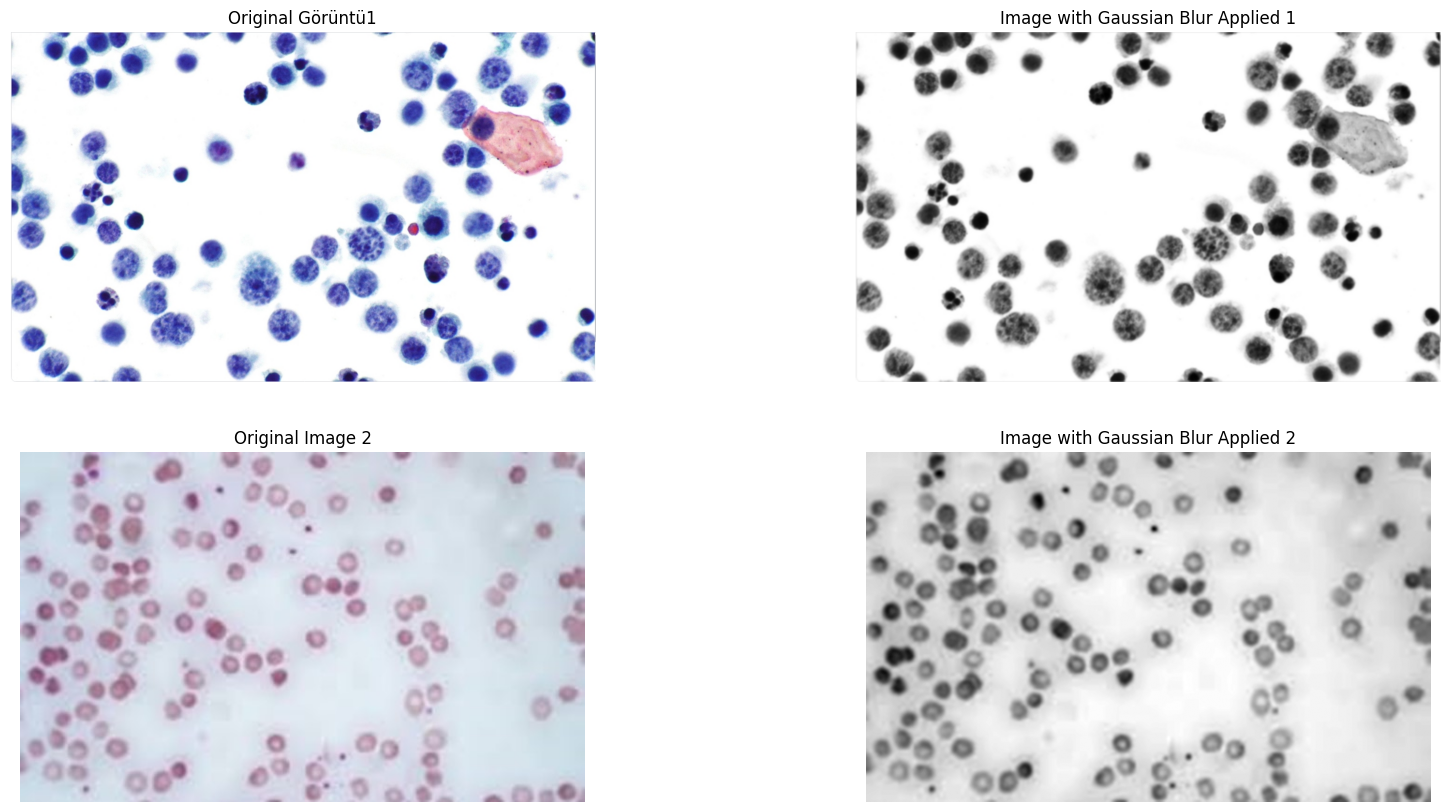

In [ ]:
# Denoising with Gaussian Blur
microscopy_image_blurred = cv2.GaussianBlur(microscopy_gray, (5,5), 0)
microscopy_image2_blurred = cv2.GaussianBlur(microscopy_gray2, (5,5), 0)

# Comparing images
# 1.Microscope Image
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(microscopy_image_rgb)
plt.title("Original Görüntü1")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(microscopy_image_blurred, cmap='gray')
plt.title("Image with Gaussian Blur Applied 1")
plt.axis("off")

# 2.Microscope Image
plt.subplot(2, 2, 3)
plt.imshow(microscopy_image2_rgb)
plt.title("Original Image 2")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(microscopy_image2_blurred, cmap='gray')
plt.title("Image with Gaussian Blur Applied 2")
plt.axis("off")

plt.show()


**Microscopic Image Segmentation with Otsu Thresholding**
---
📌Purpose:
---
To clearly separate cells and objects in microscope images from the background.

🔍Method:
---
Otsu’s thresholding algorithm was applied to two different microscope images.

The Otsu method automatically determines the optimal threshold value to divide the image into two classes: foreground and background.

As a result, cells or objects in the image were segmented in white, while the remaining areas were shown in black.

🖼️ Result:
---
The boundaries of the cells became clearer in both images.

Otsu thresholding enabled automatic and fast segmentation across different images.

This step provided a solid foundation for the subsequent morphological operations and object separation.


(np.float64(-0.5), np.float64(602.5), np.float64(373.5), np.float64(-0.5))

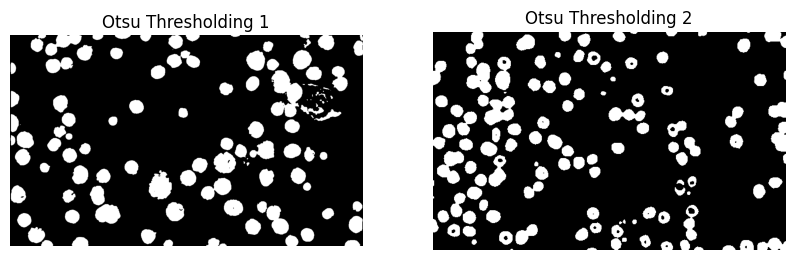

In [ ]:
#SEGMANTATION
# Otsu Thresholding
microscopy_image_blurred = cv2.bitwise_not(microscopy_image_blurred)
microscopy_image2_blurred = cv2.bitwise_not(microscopy_image2_blurred)

ret, thresh = cv2.threshold(microscopy_image_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, thresh2 = cv2.threshold(microscopy_image2_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(thresh, cmap='gray')
plt.title("Otsu Thresholding 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(thresh2, cmap='gray')
plt.title("Otsu Thresholding 2")
plt.axis("off")


**Image Cleaning and Preparation with Morphological Operations**
---
📌 Purpose:
---
To remove noise from microscope images after segmentation and enhance the visibility of cellular structures.

🛠️ Method:
---
The following morphological operations were applied to two different microscope images (Image 1 and Image 2):

For Image 1:
---
1.   **Opening (7 iterations):**
Applied to remove small noise and false-positive pixels. This process first uses erosion to eliminate small objects, then dilation to restore the size of the remaining objects close to their original form. Repeating the operation 7 times helps remove more persistent noise.

2.   **Closing (1 iteration):**

 Applied after opening to fill small gaps that may have appeared and to make cells appear more cohesive. This process first uses dilation to close small holes, followed by erosion to bring the shapes back closer to their original sizes.

For Image 2:
---
1.   Erosion (1 iteration):
Applied to shrink the cell boundaries and help separate closely positioned cells. It also helps in removing small noise.

2.   Dilation (1 iterasyon):
Applied to balance the effects of erosion and make the cell boundaries more defined again.

3. Opening (1 iterasyon):
Applied after erosion and dilation to clean remaining small noise and to give the cells a smoother form.

🖼️ Result:
---
Thanks to the applied morphological operations, noise in the images was significantly reduced. Small objects mistakenly identified as foreground (false positives) were eliminated. The boundaries of the cells became more distinct and smooth. Closely located cells became easier to separate, and more cohesive structures were achieved.

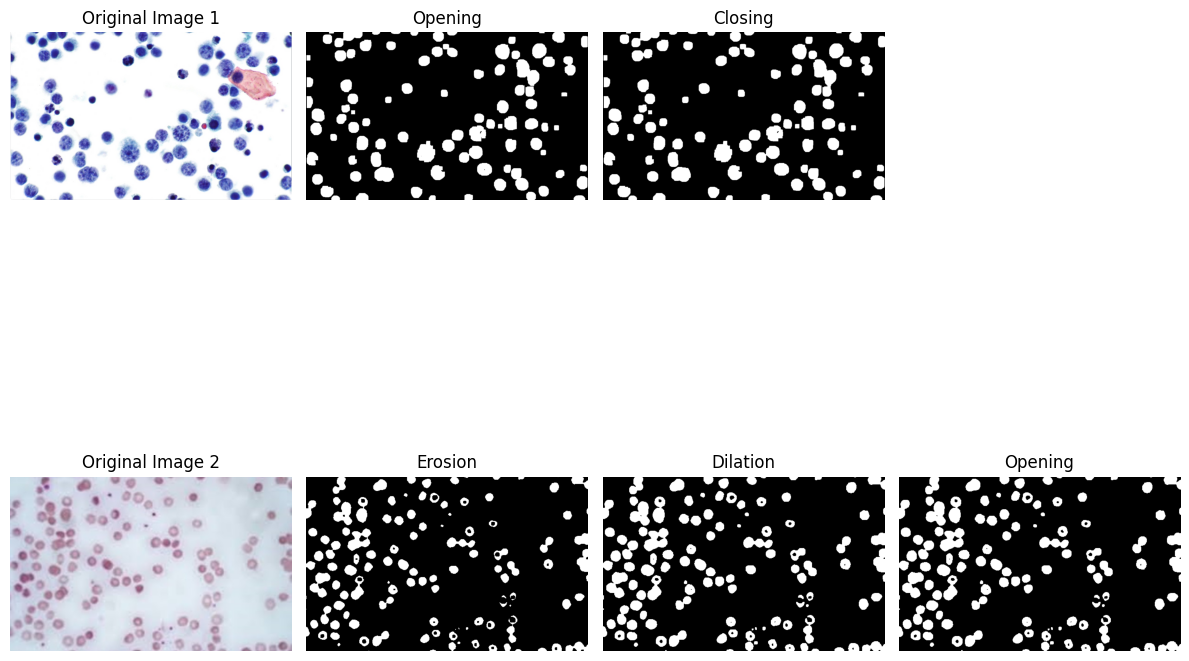

In [ ]:
# Morphological Operations
kernel = np.ones((3, 3), np.uint8)

# Morphological operations applied to the 1.Microscope Image
opening1 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=7)
closing1= cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel, iterations=1)

# Morphological operations applied to the 2.Microscope Image
erosion2 = cv2.erode(thresh2, kernel, iterations=1)
dilated2 = cv2.dilate(erosion2, kernel, iterations=1)
opening2 = cv2.morphologyEx(dilated2, cv2.MORPH_OPEN, kernel, iterations=1)

# View Results
plt.figure(figsize=(12, 10))

# First Image and Processing Results
plt.subplot(2, 4, 1)
plt.imshow(microscopy_image_rgb)
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(opening1, cmap="gray")
plt.title("Opening")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(closing1, cmap="gray")
plt.title("Closing")
plt.axis("off")

# İkinci Görüntü ve İşlem Sonuçları
plt.subplot(2, 4, 5)
plt.imshow(microscopy_image2_rgb)
plt.title("Original Image 2")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(erosion2, cmap="gray")
plt.title("Erosion")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(dilated2, cmap="gray")
plt.title("Dilation")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(opening2, cmap="gray")
plt.title("Opening")
plt.axis("off")

plt.tight_layout()
plt.show()


**Identifying Cell Foregrounds with Distance Transform**
---
📌Purpose:
---
To identify regions near the center of each cell in segmented microscope images, creating a solid foundation for object separation.

🔍 Method:
---
Distance Transform was applied to two different microscope images after morphological operations:

Distance Transform calculates the distance of each white pixel (foreground) to the nearest black pixel (background).

As a result, the central regions of the cells emerge as high-value (intense) areas.

These results were then thresholded to define the sure foreground areas.

🖼️ Result:
---
Regions closest to the centers of the cells were successfully identified.

In particular, the nuclei of touching or overlapping cells could be distinguished individually.

This step provided effective marker regions for the Watershed algorithm.







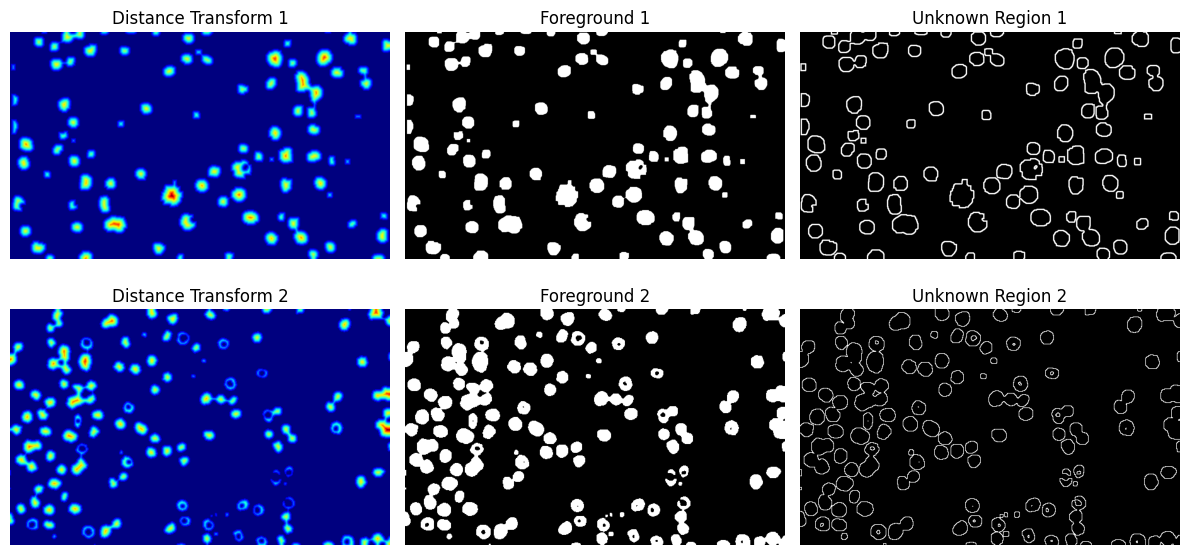

In [ ]:

# Distance Transform
dist_transform1 = cv2.distanceTransform(closing1, cv2.DIST_L2, 5)
dist_transform2 = cv2.distanceTransform(opening2, cv2.DIST_L2, 5)

# Normalize (for visualization)
dist_norm1 = cv2.normalize(dist_transform1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
dist_norm2 = cv2.normalize(dist_transform2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Determining the foreground with thresholding
ret1, sure_fg1 = cv2.threshold(dist_transform1, 0.1 * dist_transform1.max(), 255, 0)
ret2, sure_fg2 = cv2.threshold(dist_transform2, 0.1 * dist_transform2.min(), 255, 0)

sure_fg1 = np.uint8(sure_fg1)
sure_fg2 = np.uint8(sure_fg2)

# Creating the background
sure_bg1 = cv2.dilate(closing1, kernel, iterations=1)
sure_bg2 = cv2.dilate(opening2, kernel, iterations=1)


# Extract unknown regions (background - foreground)
unknown1 = cv2.subtract(sure_bg1, sure_fg1)
unknown2 = cv2.subtract(sure_bg2, sure_fg2)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(dist_norm1, cmap='jet')
plt.title('Distance Transform 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sure_fg1, cmap='gray')
plt.title('Foreground 1')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(unknown1, cmap='gray')
plt.title('Unknown Region 1')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(dist_norm2, cmap='jet')
plt.title('Distance Transform 2')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sure_fg2, cmap='gray')
plt.title('Foreground 2')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(unknown2, cmap='gray')
plt.title('Unknown Region 2')
plt.axis('off')

plt.tight_layout()
plt.show()


**Cell Boundary Detection with the Watershed Algorithm**
---
📌Purpose:
---
To successfully separate overlapping or touching cells and clearly define their boundaries.

🔍 Method:
---
The Watershed algorithm was applied to two different microscope images following morphological operations and distance transform, using the following steps:

Foreground (definite cell centers) and background regions were identified.

These regions were defined as markers.

The Watershed algorithm used these markers as references and segmented the image using a water-flooding analogy.

Cell boundaries were automatically detected and typically marked with red or green contour lines.

🖼️ Result:
---

Touching cells were successfully separated.

Each cell boundary became clearly distinguishable.

This step provided a highly effective segmentation solution for cell counting or individual cell analysis in microscope images.



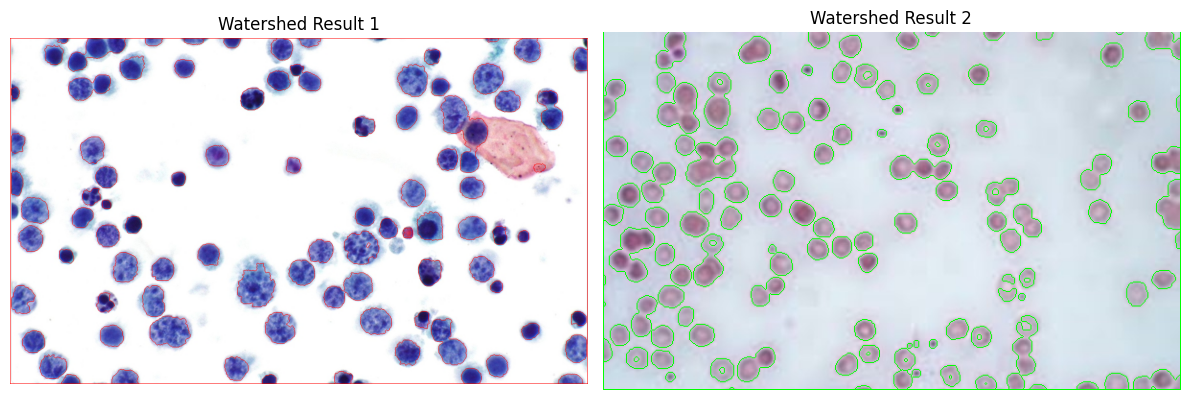

Number of cells detected in image 1: 88
Number of cells detected in image 2: 114


In [ ]:
# 1. Marker Operation:
#For Watershed to work, different cells need to be labeled with different numbers.
# Label cell interiors (foreground)
ret, markers1 = cv2.connectedComponents(sure_fg1)
ret, markers2 = cv2.connectedComponents(sure_fg2)

# Increment all labels by 1 (background = 1, cells = 2, 3, 4...)
markers1 = markers1 + 1
markers2 = markers2 + 1

# Set unknown areas to 0 (watershed will draw borders here)
markers1[unknown1 == 255] = 0
markers2[unknown2 == 255] = 0

#*************************************************************

#2.Run the Watershed algorithm:
# Run on the original color image
markers1 = cv2.watershed(microscopy_image_rgb, markers1)
markers2 = cv2.watershed(microscopy_image2_rgb, markers2)
# Here, original_img1 and original_img2 are the color microscope images you first uploaded. Watershed gives the cell boundaries a value of -1 on this image.

#----------------------------------------------------------
#3. Highlight borders:
#Watershed gives -1 value to places with border pixels. We can visualize these:
img1_ws = microscopy_image_rgb.copy()
img2_ws = microscopy_image2_rgb.copy()

# Make borders blue
img1_ws[markers1 == -1] = [255, 0, 0]
img2_ws[markers2 == -1] = [0, 255, 0]


# 4. Visualization:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1_ws)
plt.title('Watershed Result 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_ws)
plt.title('Watershed Result 2')
plt.axis('off')
plt.tight_layout()
plt.show()


# Calculate number of cells (excluding background and border from labels)
num_cells1 = len(np.unique(markers1)) - 2  # -1 (border) and 1 (background) are subtracted
num_cells2 = len(np.unique(markers2)) - 2

print(f"Number of cells detected in image 1: {num_cells1}")
print(f"Number of cells detected in image 2: {num_cells2}")